# Exploring Seaborn Visualization and Geographic Plotting

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import descartes
import geopandas as gp
from shapely.geometry import Point,Polygon

# This dataset is related to Taiwan real estate prices. 
#### The inputs are as follows   
X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)   
X2=the house age (unit: year)  
X3=the distance to the nearest MRT station (unit: meter)   
X4=the number of convenience stores in the living circle on foot (integer)   
X5=the geographic coordinate, latitude. (unit: degree)   
X6=the geographic coordinate, longitude. (unit: degree)   

#### The output is as follow   
Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared) 

In [2]:
rev=pd.read_csv('RealEstateValue.csv')

In [3]:
rev.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
No                                        414 non-null int64
X1 transaction date                       414 non-null float64
X2 house age                              414 non-null float64
X3 distance to the nearest MRT station    414 non-null float64
X4 number of convenience stores           414 non-null int64
X5 latitude                               414 non-null float64
X6 longitude                              414 non-null float64
Y house price of unit area                414 non-null float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [8]:
rev=rev.drop('No',1)
rev.columns = ['transaction_date','house_age','distance_to_MRT_station','count_convenince_store','lat','long','price_per_area_unit']

In [11]:
print("Total Count for Transaction Data: %s " %(rev['transaction_date'].value_counts().count()))

Total Count for Transaction Data: 12 


## Lets see all the relationships in the data.

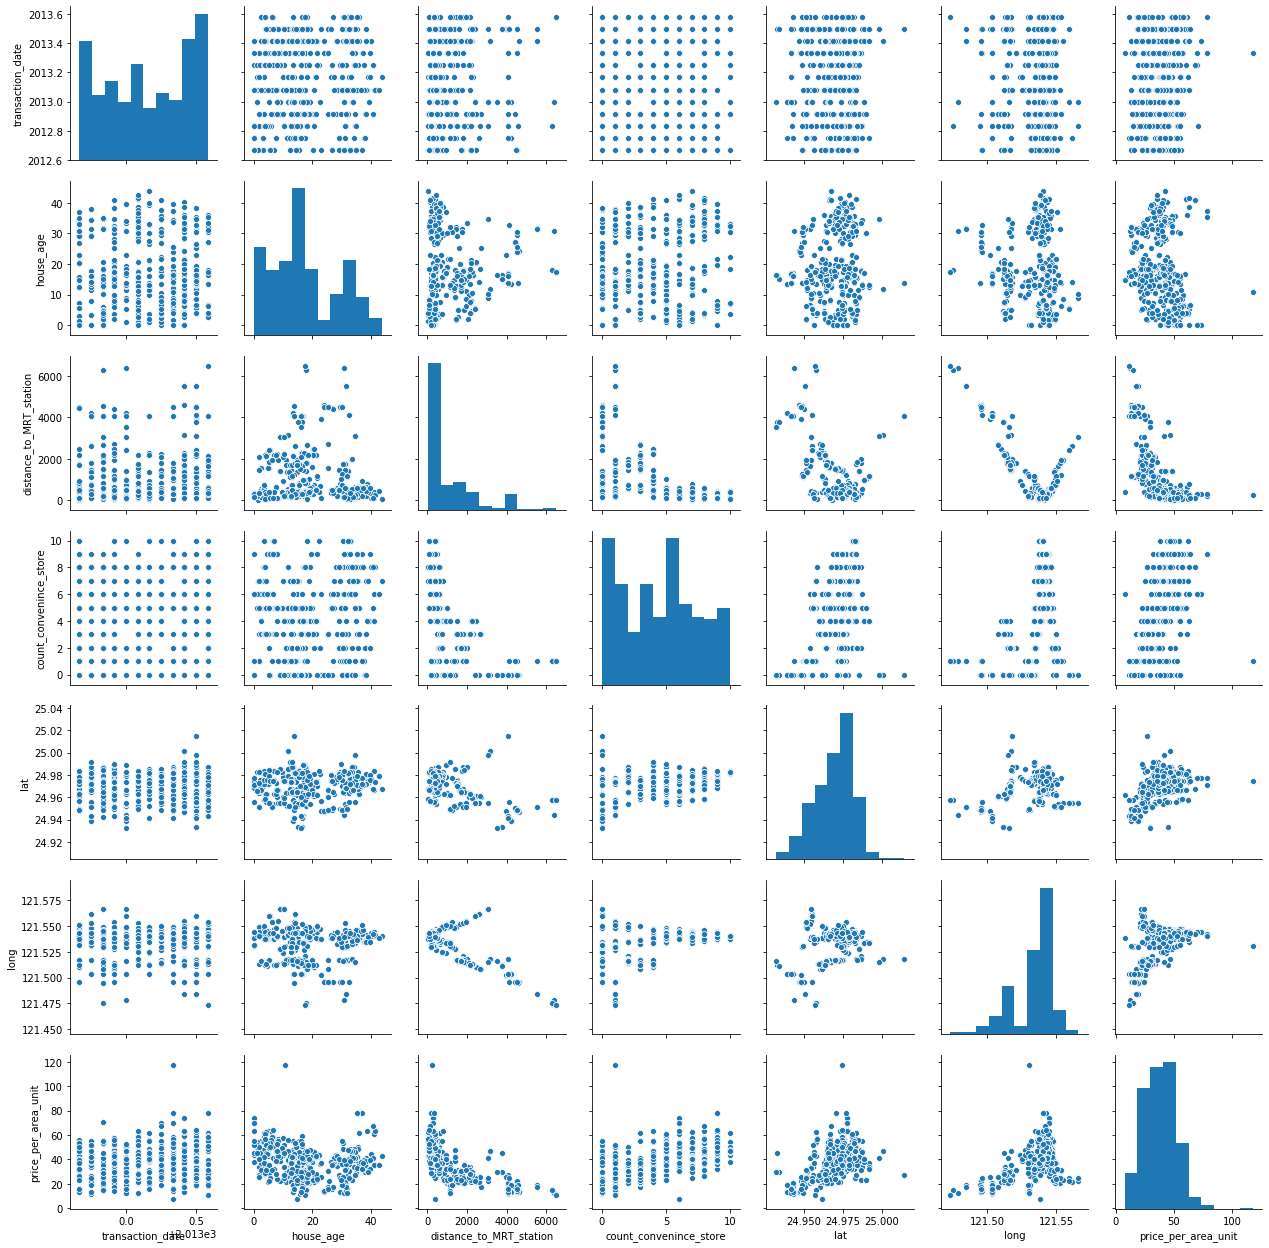

In [20]:
sns.pairplot(rev)

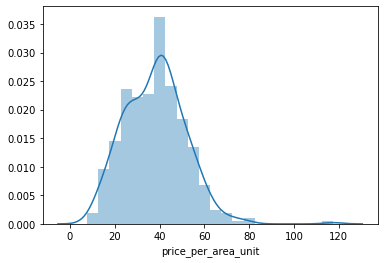

In [13]:
sns.distplot(rev['price_per_area_unit'])

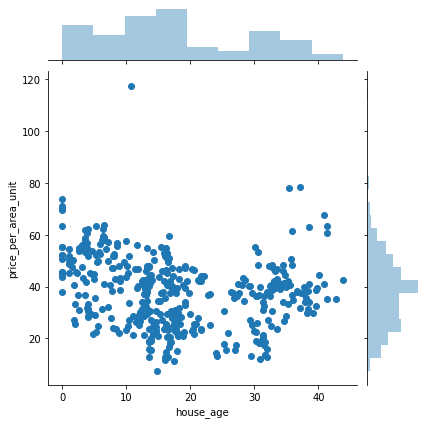

In [14]:
sns.jointplot(x='house_age',y='price_per_area_unit',data=rev)

#### Age may not be the most related to price per unit. Lets explore the other variables.

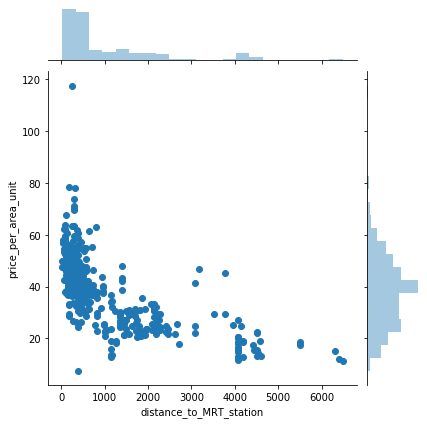

In [16]:
sns.jointplot(x='distance_to_MRT_station',y='price_per_area_unit',data=rev)

#### It appears there could be a negative correlation to the proximity of MRT stations. Let's use seaborn to check.

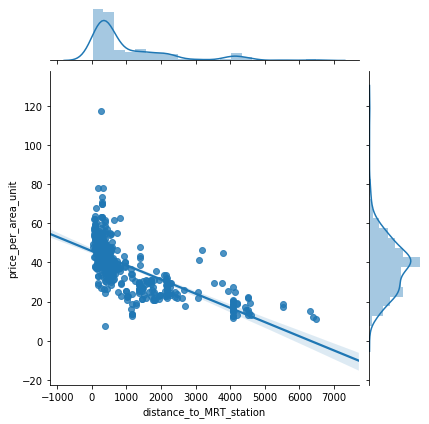

In [18]:
sns.jointplot(x='distance_to_MRT_station',y='price_per_area_unit',data=rev,kind='reg')

#### There is without a doubt a negative correlation to per unit price and proximity to MRT stations.

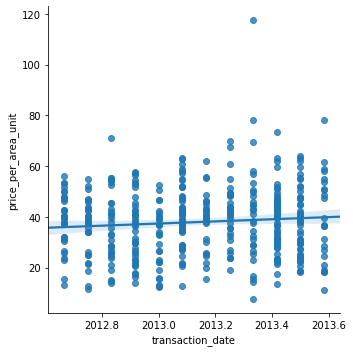

In [22]:
sns.lmplot(x='transaction_date',y='price_per_area_unit',data=rev)

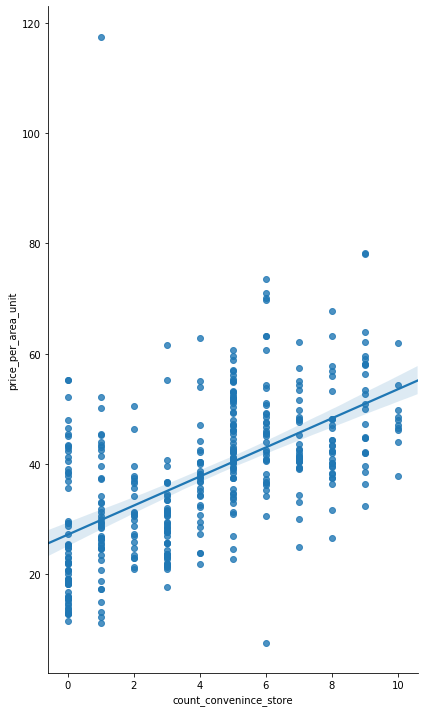

In [32]:
sns.lmplot(x='count_convenince_store',
           y='price_per_area_unit',
           data=rev,
          aspect=0.6,height=10)

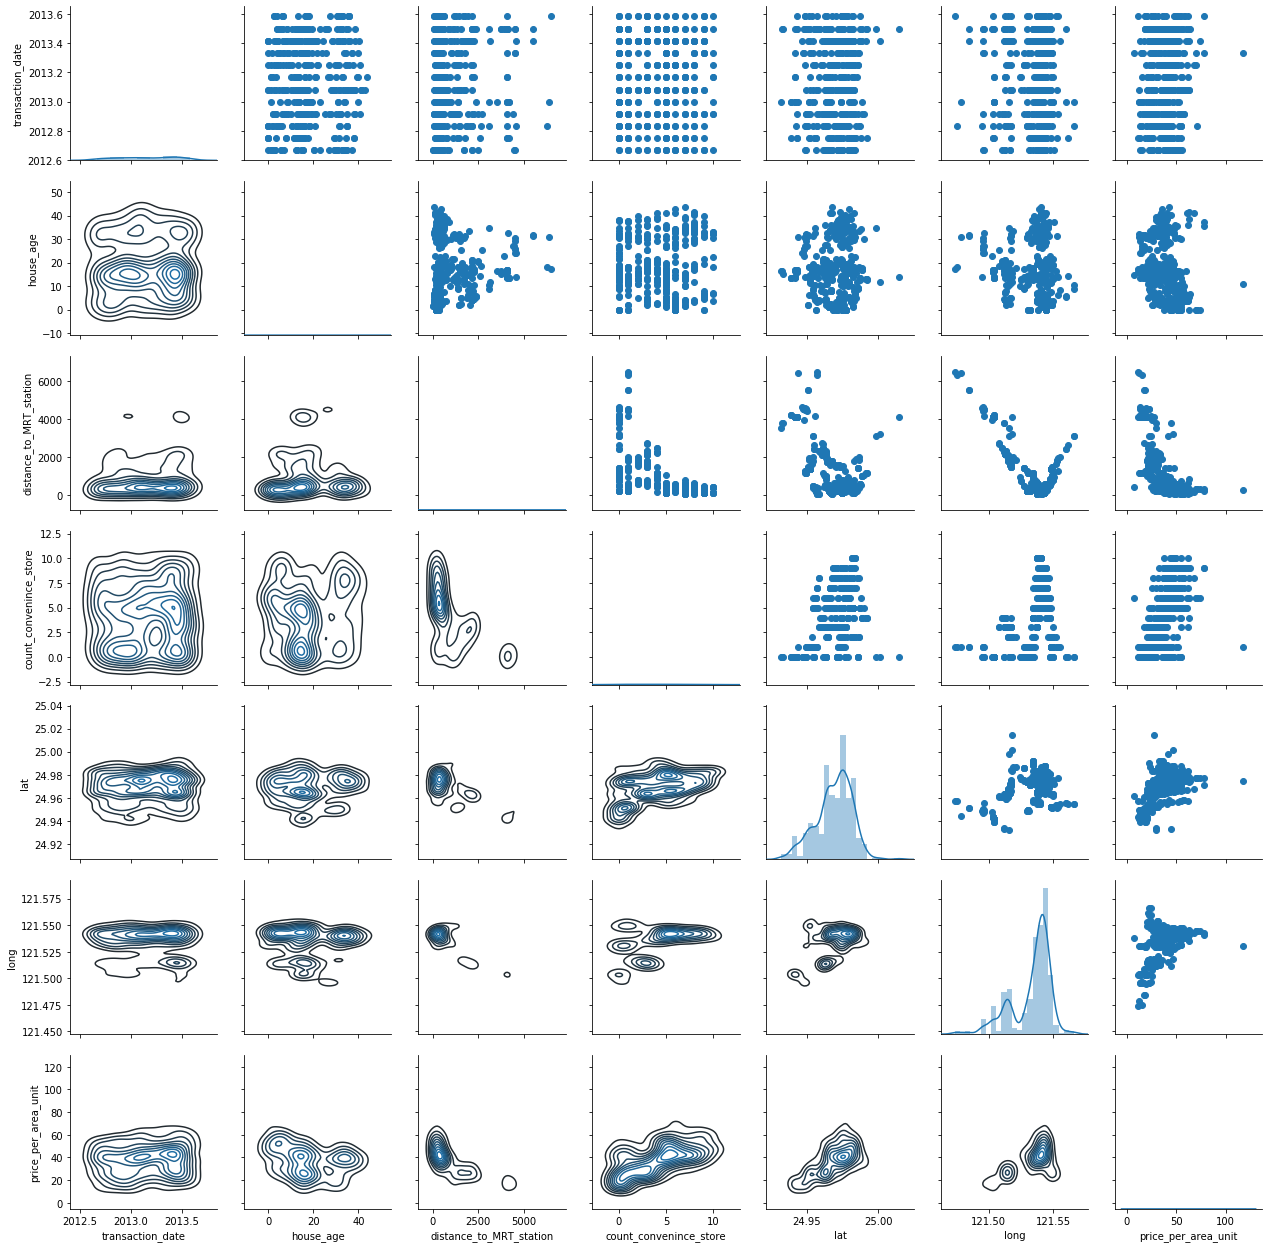

In [44]:
g=sns.PairGrid(rev)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

# The data of transaction appears to not be the most descriptive either.  
# The main points of data here appear to be the latitude and longitude values. We will now explore those variables

In [43]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))
geometry = [Point(xy) for xy in zip(rev['long'],rev['lat'])]
geometry[:3]

In [39]:
crs = {'init':'epsg:4326'}
geo_rev = gp.GeoDataFrame(rev,
                          crs = crs,
                          geometry = geometry)
geo_rev.head()

,transaction_date,house_age,distance_to_MRT_station,count_convenince_store,lat,long,price_per_area_unit,geometry
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,POINT (121.54024 24.98298)
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,POINT (121.53951 24.98034)
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,POINT (121.54391 24.98746)
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,POINT (121.54391 24.98746)
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,POINT (121.54245 24.97937)


#### Here we are able to see a closer picture of the locations in the dataset. Lets get an even closer look. 

(0, 40)

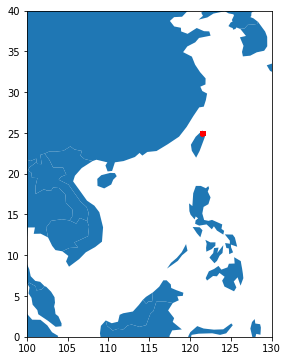

In [50]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))
geo_rev.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);
plt.xlim(120,130)
plt.ylim(0,40)

(24.9, 25.05)

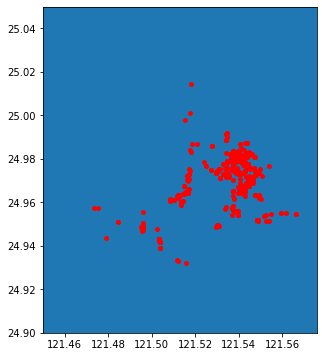

In [75]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))
geo_rev.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);
plt.xlim(121.45,121.576)
plt.ylim(24.9,25.05)

### It appears that there may be a cluster of properties. Let's check to see if they have high or low prices.

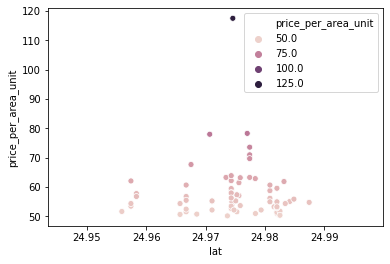

In [110]:
high_value = rev[rev['price_per_area_unit']>50] # 73 Properties
sns.scatterplot(x='lat',y='price_per_area_unit',data=rev,hue=high_value['price_per_area_unit'])


### From some external data gathering I was able to find the geolocation of Taiwan. It is 25.105497, 121.597366. It would appear that this set of values are related to properties that are a southern portion of the city. Knowing this, it is clear that the properties more near the center of Taiwan will have higher prices per area unit. The cluster discovered is the closest to the city and also features the most expensive pricing per unit.